In [2]:
from keras.layers import Input, Dense, Conv2D,MaxPooling2D,UpSampling2D,Dropout,Flatten
from keras.models import Model, Sequential
from keras.datasets import mnist
import numpy as np
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from keras import backend as K

Using TensorFlow backend.


4423680/4422102 [==============================] - 0s 0us/step


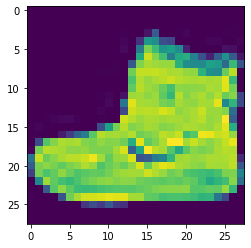

In [0]:
#load data from fashion_minist
(X_train,y_train), (X_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()
plt.imshow(X_train[0])

In [0]:
#reshape size and normalize value between 0 and 1
X_train=X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_train=X_train.astype('float32')/255.
X_test=X_test.astype('float32')/255.


In [0]:
print(y_train.shape)
print(y_train[:100])

(60000,)
[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4 3 1 4 8 4 3 0 2 4 4 5 3 6 6 0 8 5
 2 1 6 6 7 9 5 9 2 7 3 0 3 3 3 7 2 2 6 6 8 3 3 5 0 5 5 0 2 0 0 4 1 3 1 6 3
 1 4 4 6 1 9 1 3 5 7 9 7 1 7 9 9 9 3 2 9 3 6 4 1 1 8]


In [0]:
input_img = Input(shape=(28, 28, 1))
##build model
x=Conv2D(32,(3,3),activation='relu',padding='same')(input_img)
x=MaxPooling2D((2,2),padding='same')(x)
x=Conv2D(16,(2,2),activation='relu',padding='same')(x)
x=MaxPooling2D((2,2),padding='same')(x)
x=Conv2D(16,(3,3),activation='relu',padding='same')(x)
encoded=MaxPooling2D((2,2),padding='same')(x)

# Structure is (2,2,16)

#decode
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        2064      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 16)          2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 16)          0   

In [0]:
# ??????????????

autoencoder.fit(X_train,X_train,epochs=10,batch_size=128,shuffle=True,validation_data=(X_test, X_test))




Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 148s 2ms/step - loss: 1.3602 - val_loss: 0.3352
Epoch 2/10
60000/60000 [==============================] - 151s 3ms/step - loss: 0.3249 - val_loss: 0.3193
Epoch 3/10
60000/60000 [==============================] - 151s 3ms/step - loss: 0.3176 - val_loss: 0.3070
Epoch 4/10
60000/60000 [==============================] - 152s 3ms/step - loss: 0.3131 - val_loss: 0.3217
Epoch 5/10
60000/60000 [==============================] - 152s 3ms/step - loss: 0.3114 - val_loss: 0.3108
Epoch 6/10
60000/60000 [==============================] - 152s 3ms/step - loss: 0.5239 - val_loss: 0.3732
Epoch 7/10
60000/60000 [==============================] - 153s 3ms/step - loss: 0.4283 - val_loss: 0.3104
Epoch 8/10
60000/60000 [==============================] - 153s 3ms/step - loss: 0.3537 - val_loss: 0.3035
Epoch 9/10
60000/60000 [==============================] - 153s 3ms/step - loss: 0.3197 - val_l

<Figure size 432x288 with 0 Axes>

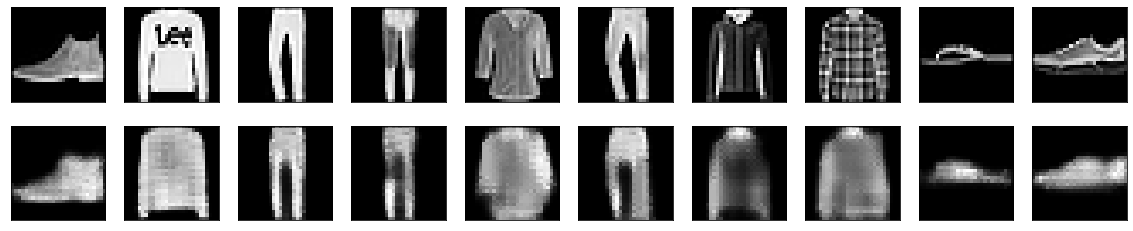

In [0]:
plt.clf()
decoded_imgs=autoencoder.predict(X_test)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i +1+ n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False) #hide x axis
    ax.get_yaxis().set_visible(False)
plt.show()

**2 Image Classification**

> We’ll continue to use the Fashion MNIST dataset and build a deep convolutionalnetwork for classification.

> **2.1    Deep CNN**


> Build  a  deep  CNN  to  classify  the  images.   Provide  a  brief  description  of  thearchitectural choices you’ve made: kernel sizes, strides, padding, network depth.Train your network end-to-end. Report on your model’s performance on trainingset and test set.






In [0]:
model=Sequential()

In [0]:
model.add(Conv2D(filters = 32,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid',
                 input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(4,4),activation='relu',strides=(1,1),padding='valid',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

## connect with flaten layer
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
print(model.summary())


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 10, 64)        32832     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

In my model, I put two convolutional layer. First layer has 32 filters and kernal size is (3,3), Relu is activation function. The second layer is pooling, sinze is (2,2). The third layer is still convolutional layer with 64 filters, kernal size (3,3),activation function is Relu. There is a maxpooling followed by this layer, and the size is (2,2). Then I add droprate at rate 0.3. Then this layer is flattened and connect with a 64 units dense layer with Relu. At output layer, there are 10 units with softmax function.

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [0]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
model_training = model.fit(X_train, Y_train,
          epochs=15,
          batch_size=256,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 65s 1ms/step - loss: 0.6351 - acc: 0.7744 - val_loss: 0.4211 - val_acc: 0.8503
Epoch 2/15
60000/60000 [==============================] - 62s 1ms/step - loss: 0.3936 - acc: 0.8596 - val_loss: 0.3608 - val_acc: 0.8701
Epoch 3/15
60000/60000 [==============================] - 61s 1ms/step - loss: 0.3427 - acc: 0.8769 - val_loss: 0.3224 - val_acc: 0.8826
Epoch 4/15
60000/60000 [==============================] - 63s 1ms/step - loss: 0.3095 - acc: 0.8878 - val_loss: 0.2942 - val_acc: 0.8920
Epoch 5/15
60000/60000 [==============================] - 62s 1ms/step - loss: 0.2849 - acc: 0.8965 - val_loss: 0.2861 - val_acc: 0.8950
Epoch 6/15
60000/60000 [==============================] - 64s 1ms/step - loss: 0.2714 - acc: 0.9007 - val_loss: 0.2762 - val_acc: 0.8993
Epoch 7/15
60000/60000 [==============================] - 64s 1ms/step - loss: 0.2542 - acc: 0.9080 - val_loss: 0.2767 - val_acc

In [0]:
model_training.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

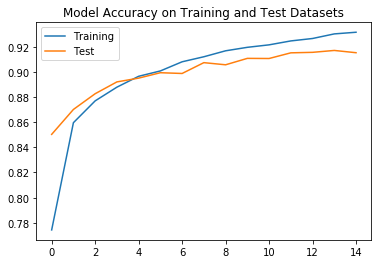

In [0]:
model_training.history.keys()
plt.plot(model_training.history["acc"], label="Training")
plt.plot(model_training.history["val_acc"], label="Test")
plt.legend()
plt.title("Model Accuracy on Training and Test Datasets")
plt.show()

Accuracy of training set has obviously increase, but accuracy of testing set increase a little. Also, accuracy of testing flactuate during the process. Finally, accuracy of testing is not as high as accuracy of training

**2.2    Transfer Learning**


>Repeat the same task, but this time utilize a pre-trained network for the major-ity of your model.  You should only train the final Dense layer, all other weightsshould be fixed.  You can use whichever pre-trained backbone you like (ResNet,VGG, etc).  Report on your model’s performance on training set and test set.



In [3]:
import keras
import tensorflow as tf
import numpy as np
from keras.applications import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing.image import img_to_array, array_to_img
from keras.layers import Dense, Dropout
from keras.models import Model
from keras import models
from keras import layers
from keras import optimizers
from keras.datasets import fashion_mnist
import cv2
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 2s 0us/step


In [0]:
#convert images into 3 channels and reshape
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)  
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
x_train_1 = np.asarray([cv2.resize(x, (48,48)) for x in x_train])
x_test_1 = np.asarray([cv2.resize(x, (48,48)) for x in x_test])
x_train_1 = x_train_1.reshape(x_train_1.shape[0], 48, 48,1)
x_test_1  = x_test_1.reshape(x_test_1.shape[0], 48, 48, 1)
x_train_1 = x_train_1.repeat(3, axis=-1)
x_test_1  = x_test_1.repeat(3, axis=-1)


In [0]:
print(x_train_1.shape)
print(x_test_1.shape)

(60000, 48, 48, 3)
(10000, 48, 48, 3)


In [5]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

conv_base = VGG16(weights="imagenet",include_top=False,input_shape=(48,48,3))
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="sigmoid"))
model.summary()





58892288/58889256 [==============================] - 5s 0us/step






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 14,752,330
Trainable params: 14,752,330
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["acc"])

tl_model = model.fit(x_train_1, y_train,batch_size=128,epochs=5, 
          validation_data=(x_test_1, y_test))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 37s 614us/step - loss: 1.3341 - acc: 0.2970 - val_loss: 0.9256 - val_acc: 0.3810
Epoch 2/5
60000/60000 [==============================] - 32s 526us/step - loss: 0.5663 - acc: 0.7252 - val_loss: 0.3528 - val_acc: 0.8806
Epoch 3/5
60000/60000 [==============================] - 32s 525us/step - loss: 0.2765 - acc: 0.9021 - val_loss: 0.2585 - val_acc: 0.9117
Epoch 4/5
60000/60000 [==============================] - 31s 525us/step - loss: 0.2205 - acc: 0.9212 - val_loss: 0.2477 - val_acc: 0.9147
Epoch 5/5
60000/60000 [==============================] - 31s 524us/step - loss: 0.1946 - acc: 0.9323 - val_loss: 0.2279 - val_acc: 0.9228


In [7]:
model.evaluate(x_test_1, y_test)

10000/10000 [==============================] - 3s 264us/step


[0.2279295228242874, 0.9228]

3.1    RNN

> build and train a Recurrent Neural Network to solve this text classification task.You can use any type of RNN you wish (SimpleRNN, GRU, LSTM).




In [9]:
from google.colab import files
uploaded = files.upload()

Saving tweets_with_labels.csv to tweets_with_labels.csv


In [0]:
import pandas as pd
import numpy as np
import io
df= pd.read_csv(io.BytesIO(uploaded['tweets_with_labels.csv']),error_bad_lines=False,delimiter='\t')

In [0]:
df

,id,tweet,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15
0,1,Jazz for a Rainy Afternoon: {link},0.0,0.000,0.0,0.000,0.0,0.0,0.000,0.0,0.000,1.000,0.0,0.0,0.000,0.0,0.0
1,2,RT: @mention: I love rainy days.,0.0,0.000,0.0,0.000,0.0,0.0,0.000,0.0,0.000,1.000,0.0,0.0,0.000,0.0,0.0
2,3,Good Morning Chicago! Time to kick the Windy C...,0.0,0.000,0.0,0.000,0.0,0.0,1.000,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0
3,6,Preach lol! :) RT @mention: #alliwantis this t...,0.0,0.000,0.0,0.000,0.0,0.0,0.604,0.0,0.196,0.000,0.0,0.0,0.201,0.0,0.0
4,9,@mention good morning sunshine,0.0,0.000,0.0,0.000,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.0,1.000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77941,120095,"Current Conditions: Fair, 78 FForecast: Sat - ...",0.0,0.000,0.0,0.206,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.0,0.794,0.0,0.0
77942,120097,WE DOIN SOMETHING DIFFERENT... SINCE THE WEATH...,0.0,0.000,0.0,0.000,0.0,0.0,1.000,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0
77943,120098,OMG #WeatherForecast for tomm 80 degrees & Sun...,0.0,0.000,0.0,0.337,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.0,1.000,0.0,0.0
77944,120100,@mention Oh no! We had cold weather early in t...,0.0,0.579,0.0,0.590,0.0,0.0,0.000,0.0,0.211,0.591,0.0,0.0,0.000,0.0,0.0


In [20]:
#import preprocessor as p
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string
nltk.download('punkt')
nltk.download('stopwords')
def clean(text):
    text = text.lower()
    #add filler into stop words
    stop_words = set(stopwords.words('english'))
    punctuation = set(list(string.punctuation) + ['…', '...','’','``',"''",'–','“',"n't",'”'])
    text = re.sub('#', '',text)
    text = re.sub(r'[-\.\n]', '',text)
    text = re.sub(r'&\w+;','',text)
    # Removing links
    text = re.sub(r'https?://\S*', '',text)
    text = text.replace('[^\w\s]','')
    word_tokens = word_tokenize(text)
    filtered_text=[]
    #looping through conditions
    for w in word_tokens:
    #check if w is punctuation or stop_word or numbers
        if w not in punctuation and w not in stop_words and w[0]!='#' and w[0]!='@':
            filtered_text.append(w)
    return ' '.join(filtered_text)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
df['clean_tweet'] = [clean(t) for t in df.tweet]


In [24]:
df

,id,tweet,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15,clean_tweet
0,1,Jazz for a Rainy Afternoon: {link},0.0,0.000,0.0,0.000,0.0,0.0,0.000,0.0,0.000,1.000,0.0,0.0,0.000,0.0,0.0,jazz rainy afternoon link
1,2,RT: @mention: I love rainy days.,0.0,0.000,0.0,0.000,0.0,0.0,0.000,0.0,0.000,1.000,0.0,0.0,0.000,0.0,0.0,rt mention love rainy days
2,3,Good Morning Chicago! Time to kick the Windy C...,0.0,0.000,0.0,0.000,0.0,0.0,1.000,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,good morning chicago time kick windy city nuts...
3,6,Preach lol! :) RT @mention: #alliwantis this t...,0.0,0.000,0.0,0.000,0.0,0.0,0.604,0.0,0.196,0.000,0.0,0.0,0.201,0.0,0.0,preach lol rt mention alliwantis type weather ...
4,9,@mention good morning sunshine,0.0,0.000,0.0,0.000,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.0,1.000,0.0,0.0,mention good morning sunshine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77941,120095,"Current Conditions: Fair, 78 FForecast: Sat - ...",0.0,0.000,0.0,0.206,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.0,0.794,0.0,0.0,current conditions fair 78 fforecast sat sunny...
77942,120097,WE DOIN SOMETHING DIFFERENT... SINCE THE WEATH...,0.0,0.000,0.0,0.000,0.0,0.0,1.000,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,doin something different since weather nice al...
77943,120098,OMG #WeatherForecast for tomm 80 degrees & Sun...,0.0,0.000,0.0,0.337,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.0,1.000,0.0,0.0,omg weatherforecast tomm 80 degrees sunny === ...
77944,120100,@mention Oh no! We had cold weather early in t...,0.0,0.579,0.0,0.590,0.0,0.0,0.000,0.0,0.211,0.591,0.0,0.0,0.000,0.0,0.0,mention oh cold weather early week 's getting ...


In [82]:
df.columns

Index(['id', 'tweet', 'k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9',
       'k10', 'k11', 'k12', 'k13', 'k14', 'k15', 'clean_tweet'],
      dtype='object')

In [0]:

X = df['clean_tweet']
y = df.drop(['id','tweet','clean_tweet'],axis = 1).values

In [28]:
X

0                                jazz rainy afternoon link
1                               rt mention love rainy days
2        good morning chicago time kick windy city nuts...
3        preach lol rt mention alliwantis type weather ...
4                            mention good morning sunshine
                               ...                        
77941    current conditions fair 78 fforecast sat sunny...
77942    doin something different since weather nice al...
77943    omg weatherforecast tomm 80 degrees sunny === ...
77944    mention oh cold weather early week 's getting ...
77945    north cascades hwy reopen wed quite late long ...
Name: clean_tweet, Length: 77946, dtype: object

In [66]:
y

array([[0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 1.   , 0.   , 0.   ],
       [0.   , 0.579, 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.338, 0.   , ..., 0.   , 0.   , 0.   ]])

In [67]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=30)
X_train_shuf, y_train_shuf = shuffle(x_train, y_train, random_state=30)
X_train, X_valid, y_train,y_valid = train_test_split(X_train_shuf,y_train_shuf,test_size = 0.20, random_state = 50)
print(X_train.shape,y_train.shape)
print(X_valid.shape, y_valid.shape)
print(x_test.shape,y_test.shape)

(49884,) (49884, 15)
(12472,) (12472, 15)
(15590,) (15590, 15)


In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=5000, lower=True)
max_num = 500 
max_length = 50 
tokenizer = Tokenizer(num_words=max_num)
tokenizer.fit_on_texts(X_train)
train_sequences = tokenizer.texts_to_sequences(X_train) 
valid_sequences = tokenizer.texts_to_sequences(X_valid)
test_sequences = tokenizer.texts_to_sequences(x_test)
text_train_2 = pad_sequences(train_sequences,maxlen=max_length)
text_valid_2 = pad_sequences(valid_sequences,maxlen=max_length)
text_test_2 = pad_sequences(test_sequences,maxlen=max_length)

In [69]:
model_RNN = Sequential()
model_RNN.add(Embedding(max_num, 64))
model_RNN.add(LSTM(32))
model_RNN.add(Dense(15, activation ='softmax'))
model_RNN.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics=['acc'])
rnn_history = model_RNN.fit(text_train_2, y_train,epochs = 10, batch_size = 128,validation_data =(text_valid_2,y_valid),verbose=1)

Train on 49884 samples, validate on 12472 samples
Epoch 1/10
49884/49884 [==============================] - 28s 557us/step - loss: 1.9029 - acc: 0.6100 - val_loss: 1.4153 - val_acc: 0.7719
Epoch 2/10
49884/49884 [==============================] - 26s 526us/step - loss: 1.3212 - acc: 0.7869 - val_loss: 1.2936 - val_acc: 0.7955
Epoch 3/10
49884/49884 [==============================] - 26s 527us/step - loss: 1.2458 - acc: 0.8025 - val_loss: 1.2571 - val_acc: 0.8030
Epoch 4/10
49884/49884 [==============================] - 26s 527us/step - loss: 1.2172 - acc: 0.8074 - val_loss: 1.2436 - val_acc: 0.8052
Epoch 5/10
49884/49884 [==============================] - 26s 524us/step - loss: 1.2007 - acc: 0.8101 - val_loss: 1.2370 - val_acc: 0.8065
Epoch 6/10
49884/49884 [==============================] - 26s 523us/step - loss: 1.1893 - acc: 0.8115 - val_loss: 1.2266 - val_acc: 0.8050
Epoch 7/10
49884/49884 [==============================] - 26s 526us/step - loss: 1.1803 - acc: 0.8115 - val_loss: 1.

In [75]:
model_CNN = Sequential()
model_CNN.add(Embedding(max_num,64))
model_CNN.add(Conv1D(64,3,padding='valid',activation='relu',strides=1))
model_CNN.add(GlobalMaxPooling1D())
model_CNN.add(Dropout(0.5))
model_CNN.add(Dense(64,activation='relu'))
model_CNN.add(Dense(15,activation='sigmoid'))
model_CNN.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics=['acc'])
cnn_history = model_CNN.fit(text_train_2, y_train,epochs = 10, batch_size = 64,validation_data =(text_valid_2,y_valid),verbose=1)

Train on 49884 samples, validate on 12472 samples
Epoch 1/10
49884/49884 [==============================] - 4s 84us/step - loss: 1.7866 - acc: 0.6203 - val_loss: 1.3109 - val_acc: 0.7729
Epoch 2/10
49884/49884 [==============================] - 3s 67us/step - loss: 1.3770 - acc: 0.7750 - val_loss: 1.2749 - val_acc: 0.8045
Epoch 3/10
49884/49884 [==============================] - 3s 66us/step - loss: 1.3295 - acc: 0.7877 - val_loss: 1.2522 - val_acc: 0.8004
Epoch 4/10
49884/49884 [==============================] - 3s 67us/step - loss: 1.2965 - acc: 0.7910 - val_loss: 1.2492 - val_acc: 0.8033
Epoch 5/10
49884/49884 [==============================] - 3s 67us/step - loss: 1.2769 - acc: 0.7937 - val_loss: 1.2444 - val_acc: 0.8022
Epoch 6/10
49884/49884 [==============================] - 3s 67us/step - loss: 1.2626 - acc: 0.7949 - val_loss: 1.2358 - val_acc: 0.8036
Epoch 7/10
49884/49884 [==============================] - 3s 67us/step - loss: 1.2514 - acc: 0.7956 - val_loss: 1.2368 - val_acc

The accuracy is 0.8017 and loss is 1.227

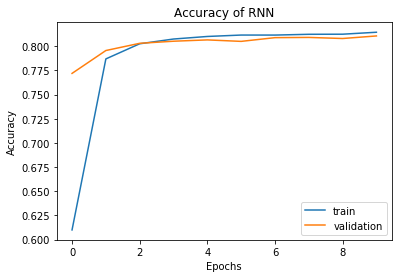

In [80]:

plt.plot(rnn_history.history['acc'])
plt.plot(rnn_history.history['val_acc'])
plt.title('Accuracy of RNN')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])



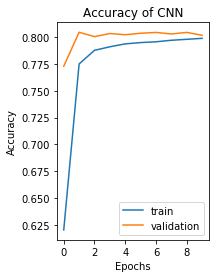

In [81]:
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['acc'])
plt.plot(cnn_history.history['val_acc'])
plt.title('Accuracy of CNN')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

I compare these two model by ploting accuracy. I cannot plot ROC since there are too many classes.